# Project water waves

Please fill in the names of the team mebers.

<div class="alert alert-block alert-danger">

<b>Team: 06</b>
- Tim Jauch 763086 
- Annabelle Heberle 770677
- Felix Hoffmann 770014

<b>Result:</b>
    
| Task   |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  | 10  | 11  |  Sum  |
|--------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|--------
| Points | ?/2 | ?/2 | ?/2 | ?/1 | ?/1 | ?/3 | ?/2 | ?/2 | ?/2 | ?/2 | ?/1 | ??/20 |  

    
</div>

## Packages

<div class="alert alert-block alert-danger">
    
<b>Important: Do not import other packages or libraries!</b>
    
</div>

### Python

In [1]:
from platform import python_version
print('python version = '+ python_version())

python version = 3.10.9


### Display images and videos

In [2]:
from IPython.display import HTML, Image, IFrame, YouTubeVideo

### NumPy

In [3]:
import numpy as np
print('numpy version = '+ np.__version__)

numpy version = 1.23.5


### SymPy

In [4]:
import sympy as sp
print('sympy version = '+ sp.__version__)
sp.init_printing()

sympy version = 1.11.1


### Matplotlib

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
print('matplotlib version = '+ matplotlib.__version__)
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10, 10)

matplotlib version = 3.7.0


### Google Colab
If you are using Google Colab mount drive and change directory.

In [6]:
if 'google.colab' in str(get_ipython()):
    print('Running on Google Colab')
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd '/content/gdrive/MyDrive/Colab Notebooks/Modelling and Simulation/water_waves'
else:
    print('Not running on Google Colab')

Not running on Google Colab


## 1 Modelling
Waves in the sea can be viewed under many different aspects.
For surfers they are the basis for their sport.
On the other hand, waves caused by a tsunami can do gigantic damage.
For the simulation of waves in the water, different mathematical-physical models exist.
However, these models are based on numerous idealised assumptions and often only provide results that are somewhat close to reality.          
The simulation of waves in water is the subject of many current research projects.
We are looking at a very simplified model in which the propagation of waves in a rectangular water basin is to be simulated.
The wave movement is initiated by a stone that is thrown into the water at a point in the pool.

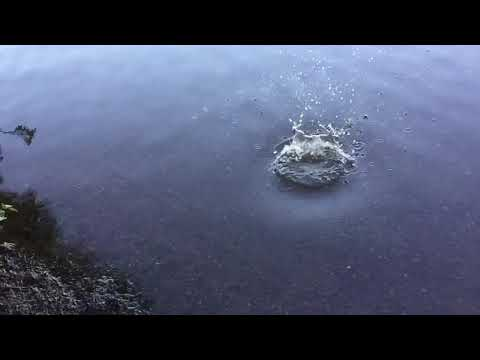

In [7]:
YouTubeVideo('RRPP73QM_4k')

In [8]:
if 'google.colab' in str(get_ipython()):
    print('IFrame() does not work with Google Colab')
else:
    display(IFrame('water_waves.gif', width=400, height=400))

## 2 Numerical treatment
To prepare the model, we first need a mathematical description of the propagation of waves in water.
By applying physical principles to this mathematical description, so-called partial differential equations are obtained.
Solving partial differential equations is generally a mathematically very challenging task.
Even for our simplified model problem no exact solutions can be determined by analytical methods.
However, with the Lax-Wendroff method numerical approximate solutions can be calculated.

### 2.1 Mathematical description of waves
If we assume that the wave propagates over a flat ground, then we can use this horizontal plane as the $x$-$y$ plane of our coordinate system.
For the mathematical description of a wave we consider a function $h$ which specifies the height of a wave above the ground in direction $z$.
The function $h$ depends on the location coordinates $(x,y)$ and the time $t$:

$$
	h(x,y,t), \quad 
    (x,y) \in \left[x_{\mbox{min}},x_{\mbox{max}}\right] \times \left[y_{\mbox{min}},y_{\mbox{max}}\right], \quad
    t \in [0,t_{\mbox{max}}] \, .
$$

The value $h(x,y,t)$ describes the height of the wave at position $(x,y)$ at time $t$.
$x_{\mbox{min}}$, $x_{\mbox{max}}$, $y_{\mbox{min}}$ and $y_{\mbox{max}}$ are used to specify the dimensions of the rectangular water basin.

<div class="alert alert-block alert-info">
    
### Task 1: Height function <font color=red>(2 points)</font>
Let us concider the time dependant function $h$ of the two variables $x$ and $y$: 
    
$$
h(x,y,t) = \frac{\mbox{e}^{-x^2-y^2}}{1+10\,t}, \quad
(x,y) \in [-2,\,2]^2, \quad
t \in [0,\,1] \, .
$$

Plot the function $h$ for $t=0.5$ and generate an animation of the time dependant function $h$.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 1</b>

Plot for $t=0.5$:
    
</div>

In [9]:
#
# hint: meshgrid(), plot_surface()
#
def heightFunctionPlot(t):
    fig = plt.gcf()
    ax = fig.add_subplot(projection='3d')
    ax.clear()
    ax.set_zlim(0.0, 1)
    
    xy = np.linspace(-2, 2, 40)
    X,Y = np.meshgrid(xy, xy)
    h = np.exp(-X**2-Y**2)/(1+10*t)




    surf = ax.plot_surface(X, Y, h)
    return surf,
    
heightFunctionPlot(0.5)

(<mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1da0fc065f0>,)

<div class="alert alert-block alert-success">  
Animation:
</div>

In [10]:
def heightFunctionAnimation():
    fig = plt.gcf()
    t = np.arange(0, 1.1, 0.1)
    anim = FuncAnimation(fig, heightFunctionPlot, frames=t, blit=True)
    display(HTML(anim.to_jshtml()))
    plt.close()
    return
    
heightFunctionAnimation()

In addition to the height we also consider the speed of the wave.
Strictly speaking, we need a three-dimensional vector field to describe the speed.
However, since the essential movement is in direction $x$ and $y$, we restrict ourselves to a two-dimensional vector field:

$$
    \left(
    \begin{array}{c}
	u(x,y,t) \\
	v(x,y,t)
    \end{array}
    \right), \quad 
    (x,y) \in \left[x_{\mbox{min}},x_{\mbox{max}}\right] \times \left[y_{\mbox{min}},y_{\mbox{max}}\right], \quad
    t \in [0,t_{\mbox{max}}] \, .
$$

The value $u(x,y,t)$ describes the $x$-coordinate of the speed of the wave at the position $(x,y)$ at time $t$, $v(x,y,t)$ describes the $y$ coordinate of the wave speed at the position $(x,y)$ at time $t$.

<div class="alert alert-block alert-info">
    
### Task 2: Velocity field <font color=red>(2 points)</font>
Let us concider the time dependant velocity field: 
    
$$
\left(
    \begin{array}{c}
        u(x,y,t) \\
		v(x,y,t) \\
    \end{array}
\right) =
(1 - t)
\left(
    \begin{array}{c}
        x \\
        y \\
    \end{array}
\right) +        
t
\left(
    \begin{array}{c}
       -y \\
        x \\
    \end{array}
\right), \quad
(x,y) \in [-2,\,2]^2, \quad
t \in [0,\,1] \, .
$$

Plot the velocity field for $t=0.5$ and generate an animation of the time dependant velocity field.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 2</b>

Plot for $t=0.5$:
    
</div>

In [11]:
#
# hint: meshgrid(), quiver()
#
def velocityFieldPlot(t):
    fig = plt.gcf()
    ax = fig.gca()
    ax.clear()
    
    x,y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1))
    u = (1-t)*x+t*-y
    v = (1-t)*y+t*x
    
    ax = fig.add_subplot(111)
    
    field = ax.quiver(x,y,u,v)
    return field,

velocityFieldPlot(0.5)

(<matplotlib.quiver.Quiver at 0x1da132487c0>,)

<div class="alert alert-block alert-success">  
Animation:
</div>

In [12]:
def velocityFieldAnimation():
    fig = plt.gcf()
    t = np.arange(0, 1.1, 0.1)
    anim = FuncAnimation(fig, velocityFieldPlot, frames=t, blit=True)
    display(HTML(anim.to_jshtml()))
    plt.close()
    return
    
velocityFieldAnimation()

### 2.2 Equations for waves in shallow water
In physics, the [Navier-Stokes equations](https://en.wikipedia.org/wiki/Navier%E2%80%93Stokes_equations), named after the French physicist Claude Louis Navier and the Irish mathematician George Gabriel Stokes, form the central tool for describing flows in liquids and gases.
Under certain idealized assumptions, it can be shown that functions $h$, $u$ and $v$, which describe movements of waves in shallow water, must satisfy the following equations: 

$$
	\begin{array}{cccccc}
		\displaystyle \frac{\partial \, h}{\partial \, t} & = & - &
		\displaystyle \frac{\partial \, (u \cdot h)}{\partial \, x} & - &
		\displaystyle \frac{\partial \, (v \cdot h)}{\partial \, y} \\
		\displaystyle \frac{\partial \, \left( u \cdot h \right)}{\partial \, t} & = & - &
		\displaystyle \frac{\partial \, (u^2 \cdot h + \frac{1}{2} \, \mbox{g} \, h^2)}{\partial \, x} & - &
		\displaystyle \frac{\partial \, (u \cdot v \cdot h)}{\partial \, y} \\
		\displaystyle \frac{\partial \, \left( v \cdot h \right)}{\partial \, t} & = & - &
		\displaystyle \frac{\partial \, (u \cdot v \cdot h)}{\partial \, x} & - &
		\displaystyle \frac{\partial \, (v^2 \cdot h + \frac{1}{2} \, \mbox{g} \, h^2)}{\partial \, y} \\
	\end{array}
    \quad \quad \quad (\mbox{Navier-Stokes})
$$

Where $g$ denotes the gravitational constant.
The derivation of these equations is based on conservation of mass and momentum.

Equations with a construction like the Navier-Stokes equations are called partial differential equations in mathematics.
For more than 150 years, mathematicians worldwide have been working with the Navier-Stokes equations.
However, many fundamental questions for these equations are still unanswered.
In 2000, the [Clay Mathematics Institute](https://www.claymath.org/millennium-problems) therefore added the Navier-Stokes equations to its list of the seven most important unsolved problems of the 21st century.  

<div class="alert alert-block alert-info">
    
### Task 3: Partial differential equation <font color=red>(2 points)</font>

Calculate the first order partial derivatives for the functions
    
$$
    \begin{array}{ccc}
	h(x,y,t) & = & \displaystyle \frac{\mathrm{e}^{-x^2-y^2}}{1+10\,t} \, , \\[1ex] 
	u(x,y,t) & = & (1-t) \, x - t \, y \, , \\[1ex]
	v(x,y,t) & = & (1-t) \, y + t \, x
    \end{array}
$$

and check, if the Navier-Stokes equations are fullfilled for these functions.
    

<div class="alert alert-block alert-success">  
<b>Solution of Task 3</b>

    
</div>

In [13]:
def checkNavierStokes():
    x,y,t = sp.symbols(['x','y','t'])


    h = sp.exp(-x**2-y**2)/(1+10*t)
    ht = h.diff(t)
    ht_0 = ht.subs(t, 0).subs(x, 0).subs(y, 0)

    u = (1-t)*x-t*y
    u_h = (u*h)
    u_ht = u_h.diff(t)
    u_ht_0 = u_ht.subs(t, 0).subs(x, 0).subs(y, 0)
    
    v = (1-t)*y+t*x
    v_h = v*h
    v_ht = v_h.diff(t)
    v_ht_0 = v_ht.subs(t, 0).subs(x, 0).subs(y, 0)

    result = False
    return result

if checkNavierStokes():
    print("Navier Stokes equation fullfilled!")
else:
    print("Navier Stokes equation NOT fullfilled!")

Navier Stokes equation NOT fullfilled!


There are numerical solution methods with which approximate solutions can be calculated for the equations of waves in shallow water.
The partial differential equation for waves in shallow water has the special design of a so-called hyperbolic differential equation.
For hyperbolic partial differential equations, the Hungarian mathematician Peter David Lax and the American mathematician Burton Wendroff developed the [Lax-Wendroff method](https://en.wikipedia.org/wiki/Lax%E2%80%93Wendroff_method) in the middle of the 20th century.

In order to be able to use this method, we set the partial differential equations in a different form.
For this purpose we substitute

$$
	\begin{array}{ccl}
        H(x,y,t) & = & h(x,y,t) \, , \\
        U(x,y,t) & = & u(x,y,t) \cdot h(x,y,t) \, , \\
        V(x,y,t) & = & v(x,y,t) \cdot h(x,y,t)
	\end{array}
    \quad \quad \quad (\mbox{substitution})
$$

in the Navier-Stokes equations and get

$$
    \frac{\partial}{\partial \, t}
    \underbrace{
    \left(
        \begin{array}{c}
		H \\
		U \\
		V
	\end{array}
    \right)
    }_{\displaystyle \mathbf{F}}
    = 
    \frac{\partial}{\partial \, x}
    \underbrace{
    \left(
	\begin{array}{c}
		-U \\
		-U^2 / H - \tfrac{1}{2} \, \mbox{g} \, H^2 \\
		-U \cdot V / H
	\end{array}
    \right)
    }_{\displaystyle \mathbf{G}_1(\mathbf{F})}
    + 
    \frac{\partial}{\partial \, y}
    \underbrace{
    \left(
	\begin{array}{c}
		-V \\
		-U \cdot V / H \\
		-V^2 / H - \tfrac{1}{2} \, \mbox{g} \, H^2
	\end{array}
    \right)
    }_{\displaystyle \mathbf{G}_2(\mathbf{F})}
    \, .
    \quad \quad \quad (\mbox{Navier-Stokes substituted})
$$

Our goal is to find approximate solutions for the functions $H$, $U$ and $V$ in the vector $\mathbf{F}$.
The back substitutions

$$
	\begin{array}{ccl}
    h(x,y,t) & = & H(x,y,t) \, , \\
	u(x,y,t) & = & \displaystyle \frac{U(x,y,t)}{H(x,y,t)} \, , \\
	v(x,y,t) & = & \displaystyle \frac{V(x,y,t)}{H(x,y,t)}
	\end{array}
    \quad \quad \quad (\mbox{back substitution})
$$

then provide approximate values for our searched functions $h$, $u$ and $v$.
Thereby $H$ must not become zero.

The implementation of the substitution and the back substitution is straight forward:

In [14]:
def substitution(h,u,v):
    
    return h, u*h, v*h

<div class="alert alert-block alert-info">
    
### Task 4: Back substitution <font color=red>(1 point)</font>
Implement the function `backSubstitution()`.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 4</b>

Implementation of the function `backSubstitution()`: 
    
</div>

In [15]:
def backSubstitution(H, U, V):
    return H, U/H, V/H


The functions `F()`, `G1()` and `G2()` are implemented in vector notation:

In [16]:
def F(H, U, V):
    return np.array([H, U, V])

def G1(F):
    g = 9.81 # gravitational constant
    [H,U,V] = F
    return np.array([-U, -U*U/H-1/2*g*H*H, -U*V/H])

<div class="alert alert-block alert-info">
    
### Task 5: Function G2 <font color=red>(1 point)</font>
Implement the function `G2()`.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 5</b>

Implementation of the function `G2()`: 
    
</div>

In [17]:
def G2(F):
    g = 9.81 # gravitational constant
    [H, U, V] = F
    
    return np.array([-V, (-U*V)/H, (-V*V)/H-1/2*g*H*H])


### 2.3 Finite difference method
Calculation methods for numerical approximate solutions of partial differential equations are in many cases based on so-called [finite difference methods](https://en.wikipedia.org/wiki/Finite_difference_method).
In these methods, the area in which the equations are to be solved is discretized by a finite number of points.
The simplest form of discretization is a rectangular grid with equidistant distances $\Delta \, x$ in direction $x$ and $\Delta \, y$ in direction $y$.
The discretization of the time $t$ takes place in equidistant time intervals $\Delta \, t$.
Based on these discretizations the partial derivatives are then approximated by finite differences.

Three different difference methods have been established to approximate the first derivative:

$$
    \begin{array}{lc}
	f'(x) \, \approx \, \displaystyle \frac{f(x+h)- f(x)}{h}    \, , & \mbox{(forward difference)} \\ 
	f'(x) \, \approx \, \displaystyle \frac{f(x)- f(x-h)}{h}    \, , & \mbox{(backward difference)}\\
	f'(x) \, \approx \, \displaystyle \frac{f(x+h)- f(x-h)}{2h} \, . & \mbox{(central difference)} \\
    \end{array}
$$

The step size $h$ corresponds to $\Delta \, t$ for partial derivatives with respect to $t$.
For partial derivatives with respect to $x$ and with respect to $y$, step size $h$ corresponds to $\Delta \, x$ and $\Delta \, y$.
Decisive for the accuracy of a finite-difference method is the dependence of the approximation accuracy on the step size $h$.
Compared to the forward and backward difference method, the central difference method usually provides a significantly higher accuracy.  



<div class="alert alert-block alert-info">
    
### Task 6: Finite difference methods <font color=red>(3 points)</font>
Calculate and plot the approximations of the first derivative of the function

$$
    f(x) = \sin(x), \quad x \in [0,2\,\pi] \, ,
$$

by the backward difference, forward difference and centered difference formula, for the step sizes

$$
    h = 2^{-k}, \quad k = 1,2,\ldots,10 \, .
$$

For each formula and for each step size, determine the maximum deviation of the approximate solutions from the exact solution.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 6</b>

Calculation and plots of the approximations for all step sizes and calculation of the maximum deviations: 
    
</div>

In [18]:
def finiteDifference():
    n = 10
    fig, axs = plt.subplots(n,figsize=(15,30))
    fd_max = np.zeros(n+1)
    bd_max = np.zeros(n+1)
    cd_max = np.zeros(n+1)

    for k in range(1,n+1):
        h = 2**(-k)
        x = np.arange(0,2*np.pi,h)
        f = np.sin(x)
        fd = (np.sin(x+h)-np.sin(x))/h
        bd = (np.sin(x)-np.sin(x-h))/h
        cd = (np.sin(x+h)-np.sin(x-h))/(2*h)
        fd_max[k] = np.max(np.abs(fd-np.cos(x)))
        bd_max[k] = np.max(np.abs(bd-np.cos(x)))
        cd_max[k] = np.max(np.abs(cd-np.cos(x)))
        axs[k-1].plot(x,fd,label='forward difference')
        axs[k-1].plot(x,bd,label='backward difference')
        axs[k-1].plot(x,cd,label='centered difference')
        axs[k-1].plot(x,np.cos(x),label='exact solution')

        fd_deviation = np.max(np.abs(fd-np.cos(x)))
        bd_deviation = np.max(np.abs(bd-np.cos(x)))
        cd_deviation = np.max(np.abs(cd-np.cos(x)))
        maxDeviation = np.max([fd_deviation, bd_deviation, cd_deviation]).round(4)
        
        axs[k-1].set_title('h = ' + str(h) + ', max deviation = ' + str(maxDeviation))
        axs[k-1].legend()
    plt.show()
    return fd_max, bd_max, cd_max
    
finiteDifference()

(array([0.        , 0.24800749, 0.12477336, 0.06244637, 0.03124635,
        0.01562454, 0.00781241, 0.00390624, 0.00195312, 0.00097656,
        0.00048828]),
 array([0.        , 0.2464505 , 0.12465284, 0.06247236, 0.03124221,
        0.01562445, 0.00781244, 0.00390622, 0.00195312, 0.00097656,
        0.00048828]),
 array([0.00000000e+00, 4.11489228e-02, 1.03841630e-02, 2.60213292e-03,
        6.50914522e-04, 1.62752470e-04, 4.06896075e-05, 1.01724950e-05,
        2.54312957e-06, 6.35782756e-07, 1.58945712e-07]))

### 2.4 Lax-Wendroff for a simplified equation

To better understand the procedure of the Lax-Wendroff method, we first consider a simplified equation:

$$
	\frac{\partial}{\partial \, t} f(x,t) =
	\frac{\partial}{\partial \, x} g(f(x,t)) \, .
    \quad \quad \quad (\mbox{simplified equation})
$$

This equation has the same structure as the substituted Navier-Stokes equations, but we are looking at only one equation where the function $f$ depends only on the two variables $x$ and $t$.

<b>Discretization</b>

The Lax-Wendroff method is based on a two-stage calculation principle, in which the derivatives are approximated by finite differences.
For $x$ we use an equidistant discretization with the step size $\Delta \, x$:

$$
	x_0 \, \rightarrow \, 
	\underbrace{x_0 + \Delta \, x}_{\displaystyle x_1} \, \rightarrow \, 
	\underbrace{x_0 + 2 \, \Delta \, x}_{\displaystyle x_2} \, \rightarrow \,
	\ldots \, \rightarrow \,  
	\underbrace{x_0 + n \, \Delta \, x}_{\displaystyle x_n} \, \rightarrow \, 	
	\underbrace{x_0 + (n+1) \, \Delta \, x}_{\displaystyle x_{n+1}} \, . 	
$$

This gives us $n$ inner points and the two border points $x_0$ and $x_{n+1}$.
Similarly, for $t$ we use an equidistant discretization with the step size $\Delta \, t$:

$$
	t_0 \, \rightarrow \, 
	\underbrace{t_0 + \Delta \, t}_{\displaystyle t_1} \, \rightarrow \, 
	\underbrace{t_0 + 2 \, \Delta \, t}_{\displaystyle t_2} \, \rightarrow \,
	\underbrace{t_0 + 3 \, \Delta \, t}_{\displaystyle t_3} \, \rightarrow \,
	\ldots \, . 	
$$

Based on the equidistant discretizations of the location $x$ and the time $t$ we determine approximate values of the function $f$:

$$
    f_i^k \approx f(x_i, t_k), \quad
	i = 0,1,2, \ldots, n, n+1, \quad
	t = 0,1,2, \ldots \, . 
$$

So the lower index $i$ specifies the location $x$ and the upper index $k$ the time $t$.
The basic idea behind the Lax-Wendroff method is to determine intermediate values in time and space.
The intermediate values are created by steps with half the step size:

$$
	f_{i+\frac{1}{2},}^{k+\frac{1}{2}} \approx 
	f \left(
	x_i + \tfrac{1}{2} \Delta x, 
	t_k + \tfrac{1}{2} \Delta t
	\right) \, .
$$


<b>First half-step (FTFS)</b>

In the simplified equation the partial derivative to $t$ is approximated by a forward difference with step size $\frac{\Delta \, t}{2}$:

$$
	\frac{\partial}{\partial \, t} f(x,t) \approx
	\frac{f_{i+\frac{1}{2}}^{k+\frac{1}{2}} - \frac{1}{2}\left( f_i^k + f_{i+1}^k \right)}{\displaystyle \frac{\Delta \, t}{2}} \, .
$$

The mean value of $f_i^k$ and $f_{i+1}^k$ is used as an approximate value for $f_{i+\frac{1}{2}}^{k}$.

The partial derivative with respect to $x$ in the simplified equation is approximated by a forward difference with increments of $\Delta \, x$:

$$
    \frac{\partial}{\partial \, x} g(f(x,t)) \approx
	\frac{g\left(f_{i+1}^k\right) - g\left(f_{i}^k\right)}{\Delta x} \, .
$$

Using both approximations for the partial derivatives in the simplified equation we get: 
$$
	\frac{f_{i+\frac{1}{2}}^{k+\frac{1}{2}} - \frac{1}{2}\left( f_i^k + f_{i+1}^k \right)}{\displaystyle \frac{\Delta \, t}{2}} =
	\frac{g\left(f_{i+1}^k\right) - g\left(f_{i}^k\right)}{\Delta x} \, .
$$

Solving this equation for $f_{i+\frac{1}{2}}^{k+\frac{1}{2}}$ yields the first half-step, increasing $t_k$ to $t_k + \frac{1}{2}\Delta \, t$:
    
$$
	f_{i+\frac{1}{2}}^{k+\frac{1}{2}} = 
	\frac{f_i^k + f_{i+1}^k}{2} +
	\frac{\Delta t}{2} \, \frac{g \left( f_{i+1}^k \right) - g \left( f_i^k \right)}{\Delta x} \, .
    \quad \quad \quad (\mbox{first half-step})
$$

From this formula the similarity to the Euler method with step size $\frac{\Delta \, t}{2}$ can be seen.
The approximate values at time $t_k + \frac{1}{2} \Delta \, t$ are calculated exclusively from approximate values at time $t_k$.
Since forward differences are used both for the discretization of time and for the discretization of space, the term <b>forward in time forward in space (FTFS)</b> is used.

<b>Second half-step (FTCS)</b>

In a second half-step, the intermediate values from the first half-step are used to calculate approximate values at time $t_{k+1}$.
For this we approximate the partial derivatives in the simplified equation again by finite differences.
This time we use forward differences for time and central differences for space.
The <b>forward in time central in space (FTCS)</b> differences provide:

$$
    \frac{f_i^{k+1} - f_i^k}{\Delta \, t} =
	\frac{g \left( f_{i+\frac{1}{2}}^{k+\frac{1}{2}} \right) - g \left( f_{i-\frac{1}{2}}^{k+\frac{1}{2}} \right)}{\Delta \, x} \, . 	
$$

Solving this equation for $f_i^{k+1}$ results in:

$$
	f_i^{k+1} = f_i^k + \Delta \, t \, \frac{g \left( f_{i+\frac{1}{2}}^{k+\frac{1}{2}} \right) - g \left( f_{i-\frac{1}{2}}^{k+\frac{1}{2}} \right)}{\Delta \, x} \, . 	
    \quad \quad \quad (\mbox{second half-step})
$$

The second half-step corresponds to an Euler method for the step size $\Delta \, t$.

### 2.5 Boundary conditions

With the previous considerations we need a left, right, upper and lower neighboring point for each point.
This assumption is fulfilled for all inner grid points.
At the border of the grid not all neighboring points are present. 
Therefore we cannot perform the half steps in the boundary points with the derived formulas.

The definition of conditions for the boundary points of the grid is called boundary conditions in partial differential equations.
There are two classical types of boundary conditions for partial differential equations.
Dirichlet boundary conditions, named after the German mathematician Peter Gustav Lejeune Dirichlet, specify function values that the function should have at the boundary.
Neumann boundary conditions, named after the German mathematician Carl Gottfried Neumann, give values of the first derivative at the boundary.

Both classical boundary conditions, however, do not fit to our problem definition.
We find suitable boundary conditions when we consider what happens when a wave hits the edge of the basin.
The essential aspect is the reflection of the wave at the pool edge.
In our model the edges of the basin are aligned parallel to the axes.
Mathematically, the reflection at the pool edge is therefore described by the fact that the corresponding velocity component in the next time step gets the negative value.
The height of the wave is taken over unchanged.
For example, for a reflection at the pool edge for $x = x_0$ the velocity component $u$ is reversed and the velocity component $v$ remains unchanged:

$$
    \begin{array}{lcl}
	h(x_0,y,t + \Delta \, t) & = & \hphantom{-}h(x_0 + \Delta \, x,y,t) \, , \\
	u(x_0,y,t + \Delta \, t) & = & -u(x_0 + \Delta \, x,y,t) \, , \\
	v(x_0,y,t + \Delta \, t) & = & \hphantom{-}v(x_0 + \Delta \, x,y,t) \, . \\
    \end{array}
$$

## 3 Implementation
Numerical solution methods for partial differential equations are usually much more computationally intensive than numerical solution methods for ordinary differential equations. 
They fall into the area of high-performance computing or number crunching.
The number of required computational operations is mainly caused by the discretization parameters $\Delta \, x$, $\Delta \, y$ and $\Delta \, t$. 
In order to increase the performance of the calculations, an efficient implementation is required, which is often realized using parallel computing on multiprocessor architectures.

### 3.1 Discretization
The discretization of time is based on an equidistant step size $\Delta \, t$:

$$
	t_0 \, \rightarrow \, 
	\underbrace{t_0 + \Delta \, t}_{\displaystyle t_1} \, \rightarrow \, 
	\underbrace{t_0 + 2 \, \Delta \, t}_{\displaystyle t_2} \, \rightarrow \,
	\underbrace{t_0 + 3 \, \Delta \, t}_{\displaystyle t_3} \, \rightarrow \,
	\ldots \, . 	
$$

For the rectangular pool we use an equidistant discretization in direction $x$ and in direction $y$:

$$
	\begin{array}{l}
	x_0 \, \rightarrow \, 
	\underbrace{x_0 + \Delta \, x}_{\displaystyle x_1} \, \rightarrow \, 
	\underbrace{x_0 + 2 \, \Delta \, x}_{\displaystyle x_2} \, \rightarrow \,
	\ldots \, \rightarrow \,  
	\underbrace{x_0 + n \, \Delta \, x}_{\displaystyle x_n} \, \rightarrow \, 	
	\underbrace{x_0 + (n+1) \, \Delta \, x}_{\displaystyle x_{n+1}} \, , \\
	y_0 \, \rightarrow \, 
	\underbrace{y_0 + \Delta \, y}_{\displaystyle y_1} \, \rightarrow \, 
	\underbrace{y_0 + 2 \, \Delta \, y}_{\displaystyle y_2} \, \rightarrow \,
	\ldots \, \rightarrow \,  
	\underbrace{y_0 + m \, \Delta \, y}_{\displaystyle y_m} \, \rightarrow \, 	
	\underbrace{y_0 + (m+1) \, \Delta \, y}_{\displaystyle y_{m+1}} \, .
	\end{array}
$$

Our goal is, to determine numerical approximation values for the functions $h$, $u$ and $v$ on this rectangular grid:  

$$
	\begin{array}{ccc}
    h_{i,j}^k & \approx & h(x_i, y_j, t_k) \, , \\
	u_{i,j}^k & \approx & u(x_i, y_j, t_k) \, , \\
	v_{i,j}^k & \approx & v(x_i, y_j, t_k) \, , \\
	\end{array}  
	\quad i = 0,1,2, \ldots, n+1, \quad j = 0,1,2, \ldots, m+1, \quad k = 0,1,2, \ldots
$$

This means, that we need to calculate three $(n+2) \times (m+2)$ matrices for each time step.

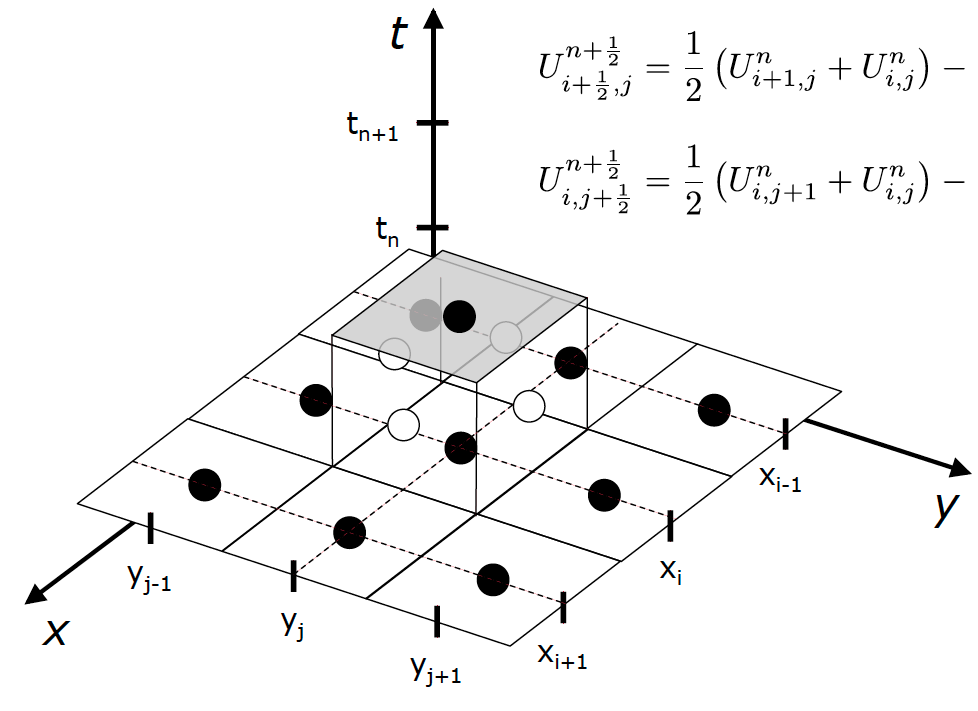

In [19]:
Image('water_waves_grid.png', width=978/2, height=711/2)

### 3.2 Half-steps
In order to carry out the half-steps we put the matrices in a vector:

$$
    F_{i,j}^{k} = 
    \left(
        \begin{array}{c}
            H_{i,j}^{k} \\ 
            U_{i,j}^{k} \\ 
            V_{i,j}^{k} \\
        \end{array}
    \right)
$$

With this notation the first half-step in direction $x$ looks like:

$$
	F_{i+\frac{1}{2},j}^{k+\frac{1}{2}} = 
	\frac{F_{i,j+1}^k + F_{i+1,j+1}^k}{2} +
	\frac{\Delta t}{2} \, \frac{G_1 \left( F_{i+1,j+1}^k \right) - G_1 \left( F_{i,j+1}^k \right)}{\Delta x} \, .
    \quad \quad \quad (\mbox{first half-step in direction $x$})
$$

In [20]:
def firstHalfStepX(dt,dx,Hk,Uk,Vk):

    n2, m2 = Hk.shape
    n = n2 - 2
    m = m2 - 2

    Hx = np.zeros([n+1,m+1])
    Ux = np.zeros([n+1,m+1])
    Vx = np.zeros([n+1,m+1])
    
    for i in range(n+1):
        for j in range(m+1):
            Fi =  F(Hk[i  ,j+1],Uk[i  ,j+1],Vk[i  ,j+1])
            Fi1 = F(Hk[i+1,j+1],Uk[i+1,j+1],Vk[i+1,j+1])
            [Hx[i,j],Ux[i,j],Vx[i,j]] = 1/2*(Fi+Fi1) + dt/(2*dx)*(G1(Fi1)-G1(Fi))
    
    return Hx, Ux, Vx

The formula for the first half-step in direction $y$ is:

$$
	F_{i,j+\frac{1}{2}}^{k+\frac{1}{2}} = 
	\frac{F_{i+1,j}^k + F_{i+1,j+1}^k}{2} +
	\frac{\Delta t}{2} \, \frac{G_2 \left( F_{i+1,j+1}^k \right) - G_2 \left( F_{i+1,j}^k \right)}{\Delta y} \, .
    \quad \quad \quad (\mbox{first half-step in direction $y$})
$$

<div class="alert alert-block alert-info">
    
### Task 7: First half-step <font color=red>(2 points)</font>
Implement the function `firstHalfStepY()` for the first half-step in direction $y$.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 7</b>

Implementation of the function `firstHalfStepY()`: 
    
</div>

In [21]:
def firstHalfStepX(dt,dx,Hk,Uk,Vk):

    n2, m2 = Hk.shape
    n = n2 - 2
    m = m2 - 2

    Hx = np.zeros([n+1,m+1])
    Ux = np.zeros([n+1,m+1])
    Vx = np.zeros([n+1,m+1])
    
    for i in range(n+1):
        for j in range(m+1):
            Fi =  F(Hk[i  ,j+1],Uk[i  ,j+1],Vk[i  ,j+1])
            Fi1 = F(Hk[i+1,j+1],Uk[i+1,j+1],Vk[i+1,j+1])
            [Hx[i,j],Ux[i,j],Vx[i,j]] = 1/2*(Fi+Fi1) + dt/(2*dx)*(G1(Fi1)-G1(Fi))
    
    return Hx, Ux, Vx

def firstHalfStepY(dt,dy,Hk,Uk,Vk):

    n2, m2 = Hk.shape
    n = n2 - 2
    m = m2 - 2

    Hy = np.zeros([n+1,m+1])
    Uy = np.zeros([n+1,m+1])
    Vy = np.zeros([n+1,m+1])
    
    for i in range(n+1):
        for j in range(m+1):
            Fj =  F(Hk[i+1,j  ],Uk[i+1,j  ],Vk[i+1,j  ])
            Fj1 = F(Hk[i+1,j+1],Uk[i+1,j+1],Vk[i+1,j+1])
            [Hy[i,j],Uy[i,j],Vy[i,j]] = 1/2*(Fj+Fj1) + dt/(2*dy)*(G2(Fj1)-G2(Fj))
    
    return Hy, Uy, Vy

The second half-step only needs to be performed once:

$$
	F_{i,j}^{k+1} = F_{i,j}^k
    + \Delta \, t \, \frac{G_1 \left( F_{i+\frac{1}{2},j}^{k+\frac{1}{2}} \right) 
    - G_1 \left( F_{i-\frac{1}{2},j}^{k+\frac{1}{2}} \right)}{\Delta \, x}	
    + \Delta \, t \, \frac{G_2 \left( F_{i,j+\frac{1}{2}}^{k+\frac{1}{2}} \right) 
    - G_2 \left( F_{i,j-\frac{1}{2}}^{k+\frac{1}{2}} \right)}{\Delta \, y} \, . 	
    \quad \quad \quad (\mbox{second half-step})
$$



In [22]:
def secondHalfStep(dt,dx,dy,Hk,Uk,Vk,Hx,Ux,Vx,Hy,Uy,Vy):
        
    n2, m2 = Hk.shape
    n = n2 - 2
    m = m2 - 2
    
    Hk1 = np.ones([n+2,m+2]) # Do not initialize with 0, since back substitution will divide by H!
    Uk1 = np.zeros([n+2,m+2])
    Vk1 = np.zeros([n+2,m+2])
    
    for i in range(1,n+1):
        for j in range(1,m+1):
            Fi  = F(Hx[i-1,j-1],Ux[i-1,j-1],Vx[i-1,j-1])
            Fi1 = F(Hx[i  ,j-1],Ux[i  ,j-1],Vx[i  ,j-1])
            Fj  = F(Hy[i-1,j-1],Uy[i-1,j-1],Vy[i-1,j-1])
            Fj1 = F(Hy[i-1,  j],Uy[i-1,  j],Vy[i-1,  j])
            [Hk1[i,j],Uk1[i,j],Vk1[i,j]] = F(Hk[i,j],Uk[i,j],Vk[i,j]) + dt/dx*(G1(Fi1)-G1(Fi)) + dt/dy*(G2(Fj1)-G2(Fj))
   
    return Hk1, Uk1, Vk1

### 3.3 Boundary conditions

For the discrete values at the edge $x_0$ we get:

$$
		\begin{array}{lcccl}
				h_{0,j}^{k+1} =  h_{1,j}^k \, , \\
				u_{0,j}^{k+1} = -u_{1,j}^k \, , \\
				v_{0,j}^{k+1} =  v_{1,j}^k \, , \\
		\end{array}
        \quad \quad \quad j = 1,2,\ldots,m \, .
$$

In the corners we propagate the values in the direction of the diagonal:

$$
		\begin{array}{lcccl}
				h_{0,0}^{k+1} = h_{1,1}^k \, , \\
				u_{0,0}^{k+1} = -u_{1,1}^k \, , \\
				v_{0,0}^{k+1} = -v_{1,1}^k \, . \\
		\end{array}
$$

All other edges and corners need to be processed in a smilar way.

<div class="alert alert-block alert-info">
    
### Task 8: Boundary conditions <font color=red>(2 points)</font>
Implement the function `boundaryConditions()` for the boundary conditions.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 8</b>

Implementation of the function `boundaryConditions()`: 
    
</div>

In [23]:
def boundaryConditions(n,m,hk,uk,vk,hk1,uk1,vk1):
    
    
    n2, m2 = hk.shape
    n = n2 - 2
    m = m2 - 2
    
    hk1[0,:] = hk1[1,:]
    uk1[0,:] = uk1[1,:]
    vk1[0,:] = vk1[1,:]
    
    hk1[n+1,:] = hk1[n,:]
    uk1[n+1,:] = uk1[n,:]
    vk1[n+1,:] = vk1[n,:]
    
    hk1[:,0] = hk1[:,1]
    uk1[:,0] = uk1[:,1]
    vk1[:,0] = vk1[:,1]
    
    hk1[:,m+1] = hk1[:,m]
    uk1[:,m+1] = uk1[:,m]
    vk1[:,m+1] = vk1[:,m]
    
    return hk1, uk1, vk1

### 3.4 Lax-Wendroff step

A Lax-Wendroff step from time $t_k$ to time $t_{k+1}$ 

$$
H_{i,j}^k, \, U_{i,j}^k, \, V_{i,j}^k
\quad \longrightarrow \quad
H_{i,j}^{k+1}, \, U_{i,j}^{k+1}, \, V_{i,j}^{k+1}
$$

consists of a first half-step in direction $x$, a first half-step in direction $y$ and a second half-step.
Finally, all values at the boundaries must be updated.

In [24]:
def laxWendroffStep(dt,dx,dy,Hk,Uk,Vk):
  
    Hx,  Ux,  Vx  = firstHalfStepX(dt,dx,Hk,Uk,Vk)
    Hy,  Uy,  Vy  = firstHalfStepY(dt,dy,Hk,Uk,Vk)
    Hk1, Uk1, Vk1 = secondHalfStep(dt,dx,dy,Hk,Uk,Vk,Hx,Ux,Vx,Hy,Uy,Vy)

    return Hk1, Uk1, Vk1

### 3.5 Initial conditions
The movement of the wave can be triggered by a wave crest or by a wave trough.
An easy way to implement this is to initialize all height values with the same constant value, except for a few values in the middle.
In the middle we can increase or decrease the values.
We must be careful that the height does not become zero.
The speed may be initialized with zero. 

<div class="alert alert-block alert-info">
    
### Task 9: Initial conditions <font color=red>(2 points)</font>
Implement the function `initialConditions()` for the initial conditions.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 9</b>

Implementation of the function `initialConditions()`: 
    
</div>

In [25]:
def initialConditions(X,Y):
       
    n2, m2 = X.shape
    n, m = n2 - 2, m2 - 2
    
    n2, m2 = X.shape
    n, m = n2 - 2, m2 - 2
    
    H = np.zeros([n+2,m+2])
    U = np.zeros([n+2,m+2])
    V = np.zeros([n+2,m+2])
    
    for i in range(n+2):
        for j in range(m+2):
            if (X[i,j] >= 0.25 and X[i,j] <= 0.75 and Y[i,j] >= 0.25 and Y[i,j] <= 0.75):
                H[i,j] = 2.0
            else:
                H[i,j] = 1.0
    
    return H, U, V

### 3.6 Lax-Wendroff simulation
With all these functions we are well prepared to implement the Lax-Wendroff simulation.
We collect the results of the simulation in the list $f$.
Each entry in the list corresponds to a vector of height and speed values for a time step

$$
    f_{i,j}^{k} = 
    \left(
        \begin{array}{c}
            h_{i,j}^{k} \\ 
            u_{i,j}^{k} \\ 
            v_{i,j}^{k} \\
        \end{array}
    \right) \, .
$$

In [26]:
def laxWendroffSimulation():

    dt = 0.05
    tmax = 10.0

    n, m = 39, 19

    x = np.linspace(-10.0,10.0,n+2)
    y = np.linspace( -5.0, 5.0,m+2)

    dx = x[1] - x[0]
    dy = y[1] - y[0]        

    X, Y = np.meshgrid(x,y)
    X = np.transpose(X) # first index x coordinate, second index y coordinate
    Y = np.transpose(Y) # first index x coordinate, second index y coordinate

    t = 0
    f = list()
    hk, uk, vk = initialConditions(X,Y)
    f.append([hk,uk,vk])

    while t < tmax:
        Hk, Uk, Vk = substitution(hk,uk,vk)
        Hk1, Uk1, Vk1 = laxWendroffStep(dt,dx,dy,Hk,Uk,Vk)
        hk1, uk1, vk1 = backSubstitution(Hk1,Uk1,Vk1)
        boundaryConditions(hk,uk,vk,hk1,uk1,vk1)
        t = t + dt
        f.append([hk1,uk1,vk1])
        hk, uk, vk = hk1, uk1, vk1
        
    return X, Y, f

#X, Y, f = laxWendroffSimulation()

## 4 Visualization
The visualization of wave propagation in shallow water can be done by displaying the height of the water for each time step in a three-dimensional coordinate system.

In [27]:
def waterWavesPlot(k):
    fig = plt.gcf()
    ax = fig.add_subplot(projection='3d')
    ax.clear()
    ax.set_zlim(0.0,2.0)
    surf = ax.plot_surface(X, Y, f[k][0])
    return surf,

def waterWavesAnimation(f):
    fig = plt.gcf()
    frames = np.arange(0,len(f),10)
    anim = FuncAnimation(fig, waterWavesPlot, frames=frames, blit=True)
    display(HTML(anim.to_jshtml()))
    plt.close()
    return
    
#waterWavesAnimation()

Colors can be used to improve the visualization.
An obvious idea is scaling the color of the faces with respect to the two speed components $u$ and $v$.
Regions with low speed are displayed in dark blue and regions with high speed in light blue.

<div class="alert alert-block alert-info">
    
### Task 10: Visualization <font color=red>(2 points)</font>
Improve the visualization of the waves by using different shades of blue with respect to the speed. 
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 10</b>

Improved visualization: 
    
</div>

In [28]:
#
# redefinition of waterWavesPlot()
#
def waterWavesPlot(k):
    fig = plt.gcf()
    ax = fig.add_subplot(projection='3d')
    ax.clear()
    ax.set_zlim(0.0,2.0)


    return surf,

#waterWavesAnimation()

## 5 Evaluation
It is not easy to evaluate the quality of the numerical approximate solutions, since we do not know any analytical solution of the equations for waves in shallow water.
For flow simulations a comparison with real experiments is usually unavoidable.

### 5.1 Verification
The quality of the numerical approximation solutions depends on the choosen step sizes for the finite difference methods.
Small step sizes will improve the results, but will increase the calculation time.
One of the most important tasks in simulations based on numerical approximation of partial differential equations is the determination of optimal step sizes.

### 5.2 Validation
When comparing the visualization with reality, it can be seen that the movement of the waves does not fade away.
This is caused by the Navier-Stokes equations, which are based on conservation of mass and conservation of momentum.
A more realistic simulation result is obtained by reducing the speed at each time step.  

<div class="alert alert-block alert-info">
    
### Task 11: Validation <font color=red>(1 points)</font>
Modify the simulation in order to make the propagation of the waves look more realistic.  
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 11</b>

Modified simulation: 
    
</div>

In [29]:
#
# redefinition of laxWendroffStep()
#
def laxWendroffStep(dt,dx,dy,Hk,Uk,Vk):
  



    
    return Hk1, Uk1, Vk1

#X, Y, f = laxWendroffSimulation()
#waterWavesAnimation()

## 6 Embedding
The Navier-Stokes equations are also used in video games to simulate various natural phenomena.
Besides simulations for water, there are simulations for fire, smoke and fog.
When used in video games, the performance of the calculations plays a important role.
In recent years, methods have been developed that are implemented directly on the graphics card (GPU).

# Literature
 - [https://en.wikipedia.org/wiki/Shallow-Water-Equations](https://en.wikipedia.org/wiki/Shallow_water_equations)
 - [https://en.wikipedia.org/wiki/Navier-Stokes-Equations](https://en.wikipedia.org/wiki/Navier%E2%80%93Stokes_equations)
 - [https://en.wikipedia.org/wiki/Finite-Difference-Method](https://en.wikipedia.org/wiki/Finite_difference_method)
 - [https://www.claymath.org/Millennium-Problems](https://www.claymath.org/millennium-problems)
 - [J.Koch, M.Stämpfle: Mathematik für das Ingenieurstudium](https://www.hanser-fachbuch.de/buch/Mathematik+fuer+das+Ingenieurstudium/9783446451667)